In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics.pairwise import cosine_similarity

In [ ]:
p_1 = pd.read_excel('ETF_data.xlsx', index_col=0)
p_1.head(10)

In [ ]:
E = cosine_similarity(p_1, p_1) #사이킷런에서 코사인 유사도 호출해서 계산

E_pd = pd.DataFrame(E) #Array를 데이터프레임으로 변환

for n in range(len(E_pd)): #편의를 위해 자신의 유사도는 0으로 변환
    E_pd.iloc[n][n] = 0

E_pd.head(10)

,0,1,2,3,4,5,6,7,8,9,...,46,47,48,49,50,51,52,53,54,55
0,0.000000,0.998646,0.985564,0.950980,0.999693,0.888741,0.952921,0.443739,0.999661,0.987059,...,0.013015,0.014897,0.043390,0.085558,0.097307,0.976287,0.012210,0.011481,0.057752,0.014792
1,0.998646,0.000000,0.992740,0.965416,0.997541,0.910521,0.966767,0.489732,0.999172,0.993518,...,0.060208,0.062085,0.090613,0.132506,0.144337,0.984831,0.059416,0.058676,0.104795,0.061973
2,0.985564,0.992740,0.000000,0.984136,0.982785,0.943403,0.983424,0.585135,0.987889,0.995090,...,0.144871,0.146713,0.175238,0.216022,0.228187,0.989661,0.144132,0.143350,0.188699,0.146576
3,0.950980,0.965416,0.984136,0.000000,0.946570,0.986710,0.999736,0.690827,0.956344,0.987701,...,0.314141,0.315917,0.343110,0.382117,0.393418,0.992424,0.313415,0.312684,0.356163,0.315798
4,0.999693,0.997541,0.982785,0.946570,0.000000,0.882660,0.948839,0.429786,0.999486,0.984911,...,0.002420,0.004304,0.032739,0.074988,0.086668,0.974282,0.001609,0.000888,0.047188,0.004205
5,0.888741,0.910521,0.943403,0.986710,0.882660,0.000000,0.985882,0.786575,0.897022,0.950423,...,0.463837,0.465492,0.490820,0.526767,0.537217,0.963925,0.463166,0.462478,0.502832,0.465377
6,0.952921,0.966767,0.983424,0.999736,0.948839,0.985882,0.000000,0.681011,0.958297,0.989061,...,0.312278,0.314060,0.341191,0.380378,0.391547,0.994206,0.311538,0.310820,0.354405,0.313948
7,0.443739,0.489732,0.585135,0.690827,0.429786,0.786575,0.681011,0.000000,0.458341,0.570572,...,0.806594,0.807371,0.821433,0.836327,0.843415,0.600355,0.806443,0.805884,0.824902,0.807186
8,0.999661,0.999172,0.987889,0.956344,0.999486,0.897022,0.958297,0.458341,0.000000,0.989794,...,0.032346,0.034228,0.062696,0.104815,0.116539,0.980526,0.031541,0.030814,0.077056,0.034125
9,0.987059,0.993518,0.995090,0.987701,0.984911,0.950423,0.989061,0.570572,0.989794,0.000000,...,0.172803,0.174656,0.202703,0.243847,0.255342,0.997896,0.172017,0.171293,0.216702,0.174551


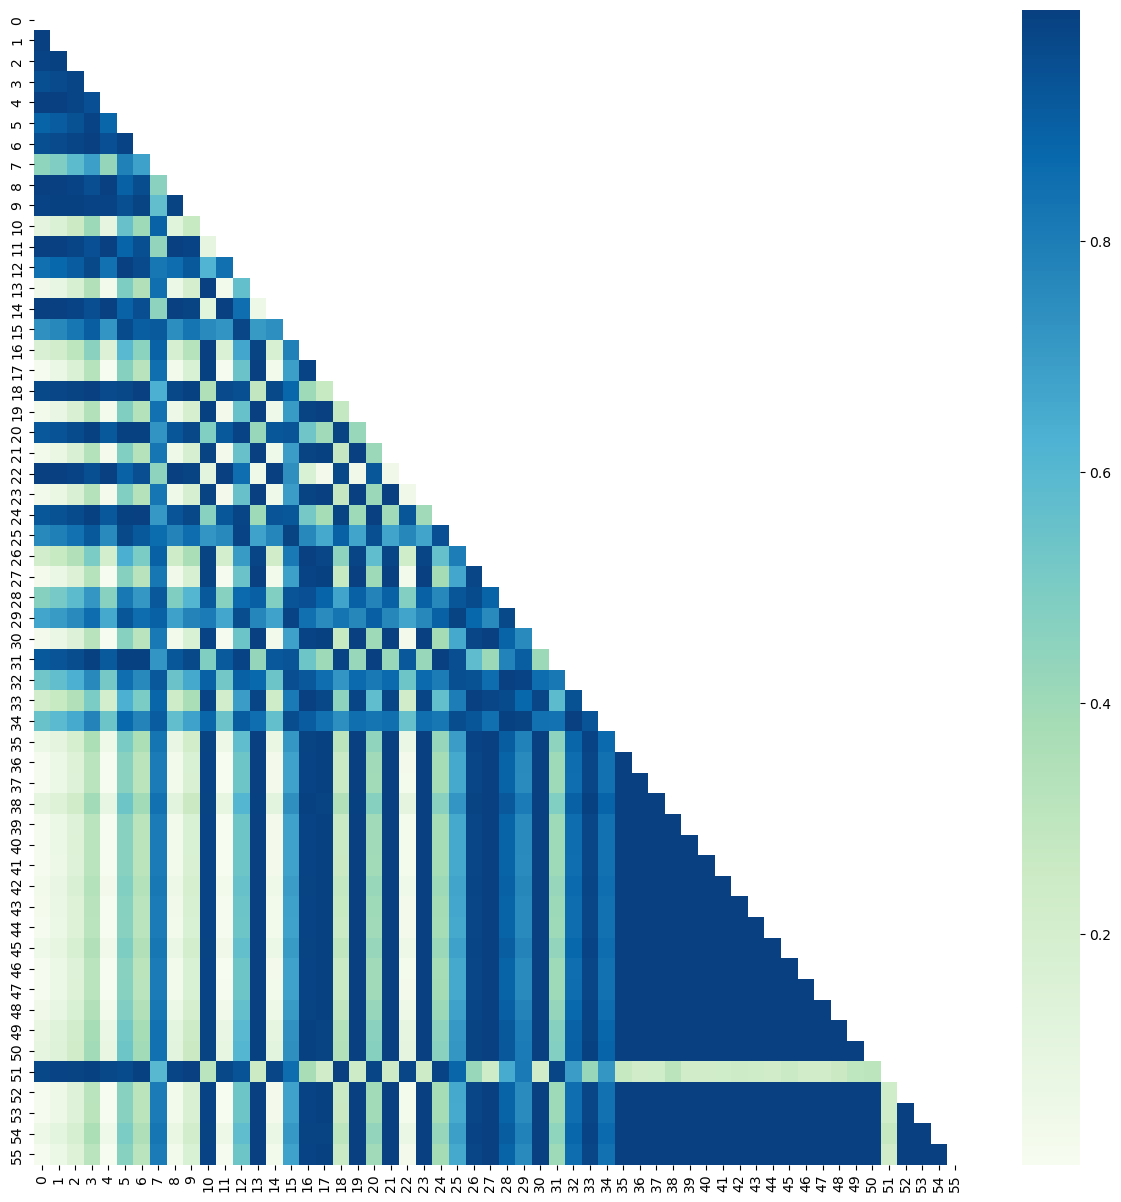

In [ ]:
mask = np.triu(np.ones_like(E, dtype="bool"))
plt.figure(figsize=(15, 15))
sns.heatmap(E_pd, cmap="GnBu", mask=mask)
plt.show()

In [ ]:
def portfolio(name):
    name_index = p_1.index.get_loc(name) #Input 행 추출
    nearest_index = E_pd.idxmax(axis=1)[name_index] #유사도 가장 높은 행 번호 추출
    nearest_portfolio = p_1.iloc[nearest_index].name #해당 인덱스 이름 반환
    r_df = p_1.iloc[[name_index,nearest_index],:]

    print(f'{name} 과 가장 유사한 포트폴리오: {nearest_portfolio}, 코사인 유사도:{E_pd[name_index][nearest_index]: .4%}')
    return r_df

In [ ]:
portfolio("TIGER 200")

TIGER 200 과 가장 유사한 포트폴리오: TIGER MSCI Korea TR, 코사인 유사도: 99.9172%


,현재가,전일비,등락률,NAV,3개월수익률,거래량,거래대금,시가총액
종목명,,,,,,,,
TIGER 200,29040,50,-0.0017,29072,0.1954,699871,20219,25395
TIGER MSCI Korea TR,11600,25,-0.0022,11648,0.1844,533891,6176,6450
